In [1]:
import requests
import pandas as pd

# Example API call
url = "https://api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,
    "page": 1,
    "sparkline": False
}

response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)
df = df[["id", "symbol", "current_price", "market_cap", "price_change_percentage_24h"]]
df.columns = ["Coin", "Symbol", "Price (USD)", "Market Cap", "24h Change (%)"]
df


,Coin,Symbol,Price (USD),Market Cap,24h Change (%)
0,bitcoin,btc,120224.000000,2392073159948,2.54402
1,ethereum,eth,3741.120000,451457367783,-0.47453
2,ripple,xrp,3.550000,210013165800,0.04454
3,tether,usdt,1.000000,161988087706,-0.00489
4,solana,sol,203.670000,109488949417,3.56289
5,binancecoin,bnb,780.720000,108603386576,2.23573
6,usd-coin,usdc,0.999874,64753616779,-0.00293
7,dogecoin,doge,0.268940,40363032634,-0.56795
8,staked-ether,steth,3726.820000,33896199774,-0.44209
9,cardano,ada,0.901121,32562796020,1.72708


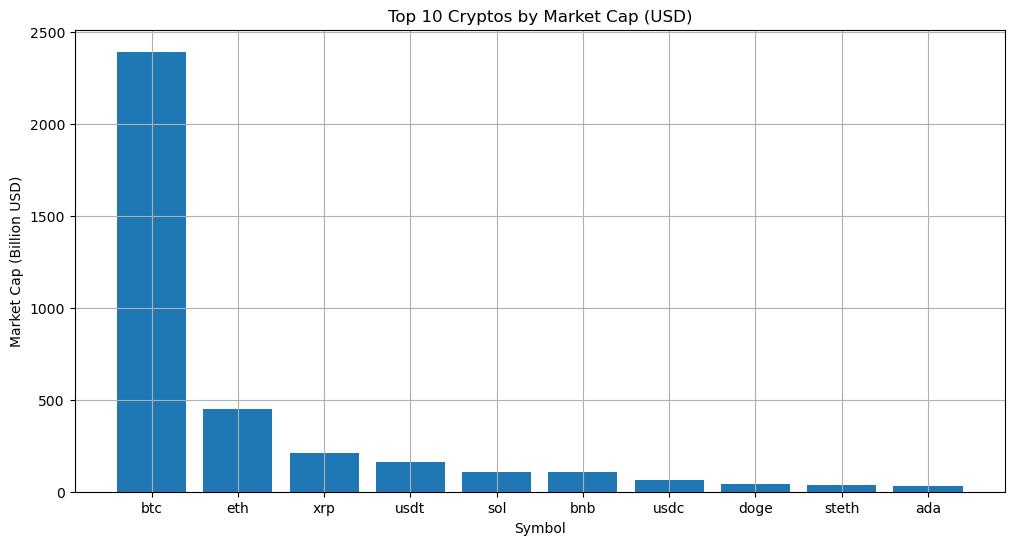

In [2]:
import matplotlib.pyplot as plt

# Bar chart: Market Cap
plt.figure(figsize=(12,6))
plt.bar(df["Symbol"], df["Market Cap"] / 1e9)  # in billions
plt.title("Top 10 Cryptos by Market Cap (USD)")
plt.xlabel("Symbol")
plt.ylabel("Market Cap (Billion USD)")
plt.grid(True)
plt.show()


In [5]:
def get_price(coin_id):
    url = f"https://api.coingecko.com/api/v3/simple/price"
    params = {"ids": coin_id, "vs_currencies": "usd"}
    r = requests.get(url, params=params)
    return r.json()[coin_id]["usd"]

print("ETH Price:", get_price("ethereum"))


ETH Price: 3742.16


In [6]:
def get_price(coin_id):
    try:
        url = "https://api.coingecko.com/api/v3/simple/price"
        params = {"ids": coin_id, "vs_currencies": "usd"}
        r = requests.get(url, params=params)
        r.raise_for_status()
        return r.json()[coin_id]["usd"]
    except Exception as e:
        return f"Error fetching price for '{coin_id}': {str(e)}"
